# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your instructional team.
---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

In [7]:
sns.set_style('dark')
plt.style.use('seaborn')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

---

## Load data

In [10]:
df = pd.read_csv('./mypersonality.csv')

# df = pd.read_csv('data/mypersonality_noprofanity.csv') # comment out above & 
# uncomment this to use mypersonality_noprofanity.csv


df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 
                 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY'], inplace=True)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

#### Create a new column called `status_length` that contains the length of each status:

In [11]:
df['status_length'] = df['STATUS'].str.len()

In [12]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'status_length'],
      dtype='object')

In [13]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,42
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,11


#### Create a new column called `status_word_count` that contains the number of words in each status:

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [14]:
df['status_word_count'] = df['STATUS'].str.split().str.len()

In [15]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63,13
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121,26
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,42,9
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,11,3


### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

#### Show the five longest and five shortest statuses based off of `status_word_count`:

In [16]:
df.nsmallest(5, 'status_word_count')

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
5,b7b7764cfa1c523e4e93ab2a79a946c4,www.thejokerblogs.com,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,07/16/09 03:21 PM,21,1
26,b7b7764cfa1c523e4e93ab2a79a946c4,<3,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,09/08/09 11:00 PM,2,1
144,318bf822d4f2bd3920367560218619c0,ARGGGGGGGGGGGGG!!!!!!!,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,09/15/09 05:00 AM,22,1
200,ecbddbfe00e0f83cfdb802a7186061c7,:)))))))),4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,11/22/09 09:39 PM,9,1
221,ecbddbfe00e0f83cfdb802a7186061c7,SNOW!!!,4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,12/07/09 05:59 PM,7,1


In [17]:
df.nlargest(5, 'status_word_count')

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
496,9a8cf1dcb2de1a8f70c4745a636bbb96,"Exact words when renewing DL: Me: Oh no, you can't take my license, It's my 25th b-day. How am I going to get into the bar? DMV: We gonna give you a new one over there Me: But, it won't have my picture and stuff on it. Dmv: Hold up, we can take a picture of your picture and put it on a license i think. (yelling at co-worker to see if this can be done) Yup! Me: So, I can go to the bar?! Dmv: ...",3.75,3.25,4.50,5.00,4.00,y,y,y,y,y,10/30/09 02:05 PM,413,89
6989,502db2fcfe26705ae16a46c5cb2ad2e5,"If I wear makeup, I'm fake. If I like to get dressed up, I'm a Tart. If I say what i think, I'm a bitch. If I cry sometimes, I'm a drama queen. If I have guy friends, I'm a slut. If I stand up for myself, I'm mouthy. Seems like you can't do anything now a days without being labeled.. So what, go ahead and label me, see if i give a shit. Repost this if your proud of who you are! x x",3.20,3.30,4.55,3.20,4.45,n,y,y,n,y,02/18/11 08:33 AM,384,85
5208,c85845b82e705a32f674757d8912df23,"can't believe it. I got the new Wii Fit Plus game, it has a lot of fun new games and features. However, after not using the wii fit for a few months we decided to do the fitness test stuff again. Me(since last time): +2.9 lbs, still a healthy weight and BMI, wii age 54. *PROPNAME*: -8.6lbs, reccommends a healthy weight of gaining 6lbs, wii age 32. On the positive side, I have lost 5 of the 8 l...",2.25,2.75,4.50,4.25,2.50,n,n,y,y,n,01/08/10 07:32 PM,426,84
4665,f7456ac4e6b20911c40fdad18908a8d2,"worst night ever! then I get this message? ""hey so i just moved up here and ill be honest, living with someone but not getting needs met sexually and hoping to find someone in same position or at least who understands and can be discrete, if you may be interested let me know ,if not i am very sorry to have bothered you"" I could be a god damn serial killer who gets off setting people on fire ur...",4.25,1.55,4.45,4.35,3.80,y,n,y,y,y,09/21/09 04:24 AM,420,83
5680,1ece40ac9b657dea8c22a1fe58d3a6fe,"I always make it a rule to let the other fellow fire first. If a man wants to fight, I argue the question with him and try to show him how foolish it would be. If he can't be dissuaded, why then the fun begins but I always let him have first crack. Then when I fire, you see, I have the verdict of self-defence on my side. I know that he is pretty certain in his hurry, to miss. I never do.",3.50,1.75,4.75,3.00,4.25,n,n,y,n,y,12/07/09 04:07 AM,395,83


In [18]:
#Show first five longest statuses
#df.sort_values(by=['status_word_count'], ascending=False).head()

In [19]:
#Show five shortest statuses
#df.sort_values(by=['status_word_count'], ascending=True).head()

## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

Text(0.5, 1.0, 'Distribution of Status Length')

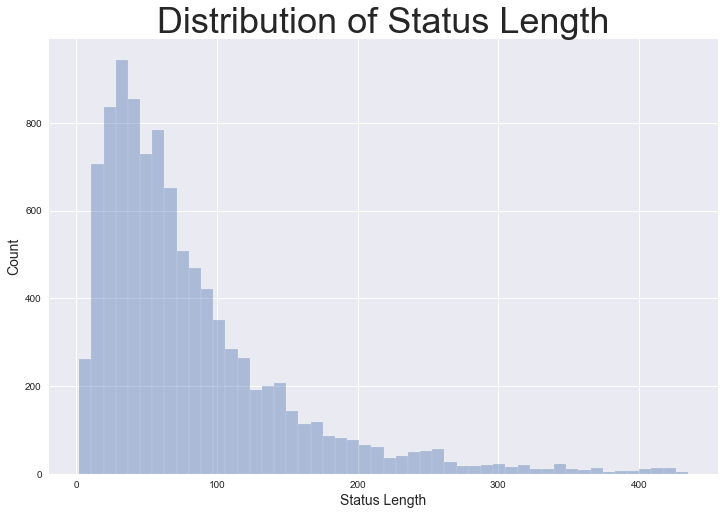

In [20]:
plt.figure(figsize = (12, 8))
sns.distplot(df.status_length, kde=False)
plt.xlabel('Status Length', size=14)
plt.ylabel('Count', size=14);
plt.title('Distribution of Status Length', fontsize=36)

In [21]:
df.head(1)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5


---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

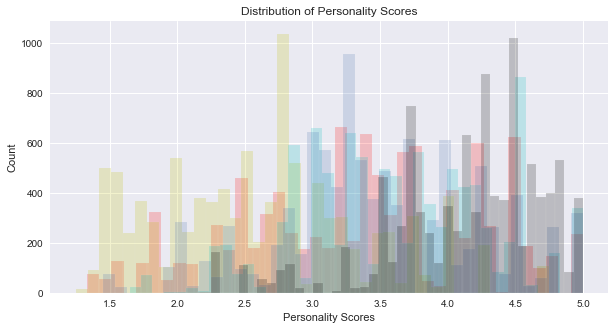

In [22]:
plt.figure(figsize = (10,5))
plt.title('Distribution of Personality Scores')
plt.xlabel('Personality Scores')
plt.ylabel('Count')
plt.hist(df.sEXT, bins =40, color='r', alpha=.2)
plt.hist(df.sNEU, bins =40, color='y', alpha=.2)
plt.hist(df.sAGR, bins =40, color='c', alpha=.2)
plt.hist(df.sCON, bins =40, alpha=.2)
plt.hist(df.sOPN, bins =40, color='black', alpha=.2);

In [23]:
df.head(1)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5


---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [24]:
df.rename(columns = {'#AUTHID': 'auth_id'}, inplace=True)

In [25]:
df.columns

Index(['auth_id', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'status_length',
       'status_word_count'],
      dtype='object')

In [26]:
df.shape

(9916, 15)

In [27]:
#How many unqiue users are there
#df['auth_id'].unique()
df['auth_id'].value_counts(normalize=True)

e6cdef6f475cce3023c5b715f8c9f110    0.022489
6f2bebc01062eb8334dccba3e048fdb5    0.022086
527ed53d2ba3a3bc417b8402d5b2f556    0.019564
d7e500ad854a1b6ced39e53a525b8a6d    0.018556
0737e4e4980f56c9fb1cb5743001c917    0.017346
                                      ...   
f6cb2eff458f065858363e86515beaab    0.000101
19c6d69f9f5acc1a43d6ac498085e69f    0.000101
8974aab97d9fc4e3a53ba126b5eedd81    0.000101
5532642937eb3497a43e15dbb23a9d2d    0.000101
22d1f7b24168528163c515b1c96a879c    0.000101
Name: auth_id, Length: 250, dtype: float64

In [28]:
#counts distinct oservations over requested axis 
df['auth_id'].nunique()

250

In [29]:
#how may posts per user do we have 
sort_users = df.sort_values('auth_id', ascending=False)
sort_users

,auth_id,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
7908,fffafe151f07a30a0ede2038a897b680,*PROPNAME*'s Your Uncle is my Cheers.,3.05,1.80,3.35,2.95,4.35,n,n,n,n,y,01/06/10 08:48 AM,37,6
7898,fffafe151f07a30a0ede2038a897b680,stairs are painfull,3.05,1.80,3.35,2.95,4.35,n,n,n,n,y,11/12/09 06:40 PM,19,3
7889,fffafe151f07a30a0ede2038a897b680,Is flying back friday night in time to move the rest of his stuff then go to work the next morning... great.,3.05,1.80,3.35,2.95,4.35,n,n,n,n,y,07/22/09 05:54 PM,108,22
7890,fffafe151f07a30a0ede2038a897b680,is stealing his net by the lake,3.05,1.80,3.35,2.95,4.35,n,n,n,n,y,07/19/09 04:39 PM,31,7
7891,fffafe151f07a30a0ede2038a897b680,Ames tommorow back in time for the game,3.05,1.80,3.35,2.95,4.35,n,n,n,n,y,09/26/09 12:15 AM,39,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,02c37028a782cfda660c7243e45244bb,abcdefghijklmnopqrstuvwxyz qwertyuiopasdfghjklzxcvbnm mnbvcxzlkjhgfdsapoiuytrewq,2.05,4.00,2.20,2.20,3.75,n,y,n,n,n,10/30/09 07:23 PM,80,3
9692,02c37028a782cfda660c7243e45244bb,Pa><dol x 2,2.05,4.00,2.20,2.20,3.75,n,y,n,n,n,12/26/09 10:57 AM,11,3
9693,02c37028a782cfda660c7243e45244bb,cartography+Select. Topics in the Geography of China (????F?add?...),2.05,4.00,2.20,2.20,3.75,n,y,n,n,n,12/31/09 09:26 AM,72,8
9694,02c37028a782cfda660c7243e45244bb,DEA DEA DEA :D,2.05,4.00,2.20,2.20,3.75,n,y,n,n,n,01/22/10 03:18 PM,14,4


## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

#### Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:

If you do this correctly, it should have 250 rows and 11 columns.

In [30]:
unique_users = df[['auth_id','sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']]

In [31]:
unique_users.head()

,auth_id,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y
1,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y
2,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y
3,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y
4,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y


In [32]:
unique_users['cOPN'].value_counts()

y    7369
n    2547
Name: cOPN, dtype: int64

In [33]:
unique_users.drop_duplicates(inplace=True)

In [34]:
unique_users.shape

(250, 11)

#### Plot the distribution of personality scores for `unique_users`:

Do the distributions look different? Here, each individual user will only be represented once.

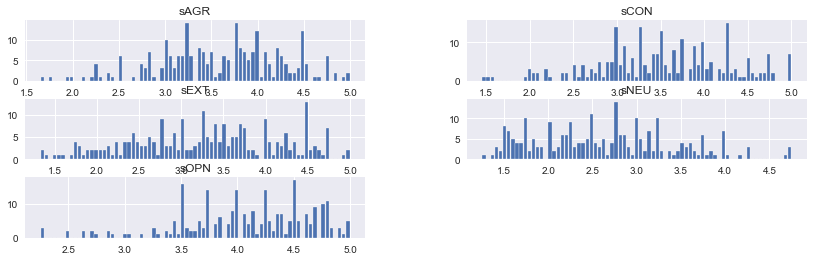

In [35]:
unique_users.hist(bins=75, rwidth=.8, figsize=(14,4))
#plt.title()
plt.show()

In [36]:
unique_users['cEXT'].replace({'n': 0, 'y':1}, inplace=True)
unique_users['cNEU'].replace({'n': 0, 'y':1}, inplace=True)
unique_users['cAGR'].replace({'n': 0, 'y':1}, inplace=True)
unique_users['cCON'].replace({'n': 0, 'y':1}, inplace=True)
unique_users['cOPN'].replace({'n': 0, 'y':1}, inplace=True)

In [37]:
unique_users.head()

,auth_id,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.00,3.15,3.25,4.40,0,1,0,0,1
102,318bf822d4f2bd3920367560218619c0,4.50,4.00,3.00,4.50,3.75,1,1,0,1,0
171,ecbddbfe00e0f83cfdb802a7186061c7,4.30,2.15,3.60,3.30,4.10,1,0,1,0,1
236,db39f7b2aad360b1033ec1f8fcd57f9c,4.65,3.20,3.05,3.65,4.75,1,1,0,1,1
246,4d035bd3fd8d9595d15cea9e388964be,3.70,2.90,3.40,3.35,4.05,1,1,0,0,1


<Figure size 720x360 with 0 Axes>

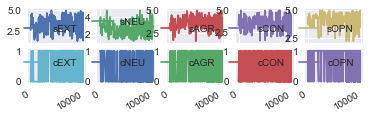

In [38]:
plt.figure(figsize = (10,5))
unique_users.plot(subplots=True, layout=(5,5));

#### Use the `.describe()` method on `unique_users`:

In [39]:
unique_users.describe()

,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,3.292120,2.627240,3.600320,3.522920,4.07856,0.384000,0.396000,0.536000,0.520000,0.704000
std,0.861368,0.776835,0.670758,0.740211,0.57506,0.487334,0.490045,0.499703,0.500602,0.457407
min,1.330000,1.250000,1.650000,1.450000,2.25000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.662500,2.000000,3.150000,3.000000,3.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.300000,2.590000,3.660000,3.500000,4.15000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,4.000000,3.150000,4.100000,4.050000,4.50000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,4.750000,5.000000,5.000000,5.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Barcharts of users per category per trait
- A seaborn correlation heatmap
- A seaborn pairplot

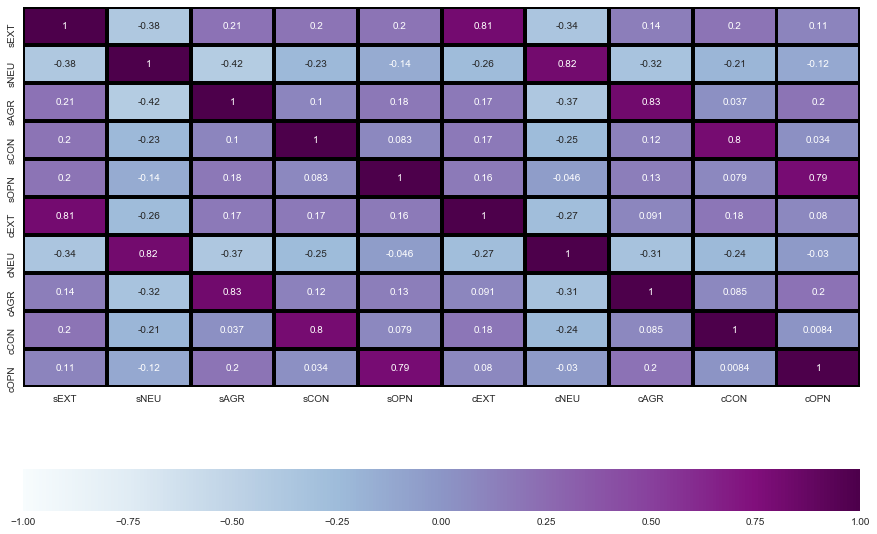

In [40]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
corr = unique_users.corr()

sns.heatmap(corr, xticklabels=corr.columns,
                  yticklabels = corr.columns, 
                  annot=True, 
                  cmap="BuPu",
                  vmin=-1, vmax=1, center= 0, 
                  linewidths=3, linecolor='black', 
                  cbar_kws= {'orientation': 'horizontal'});

In [41]:
unique_users.head(1)

,auth_id,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1


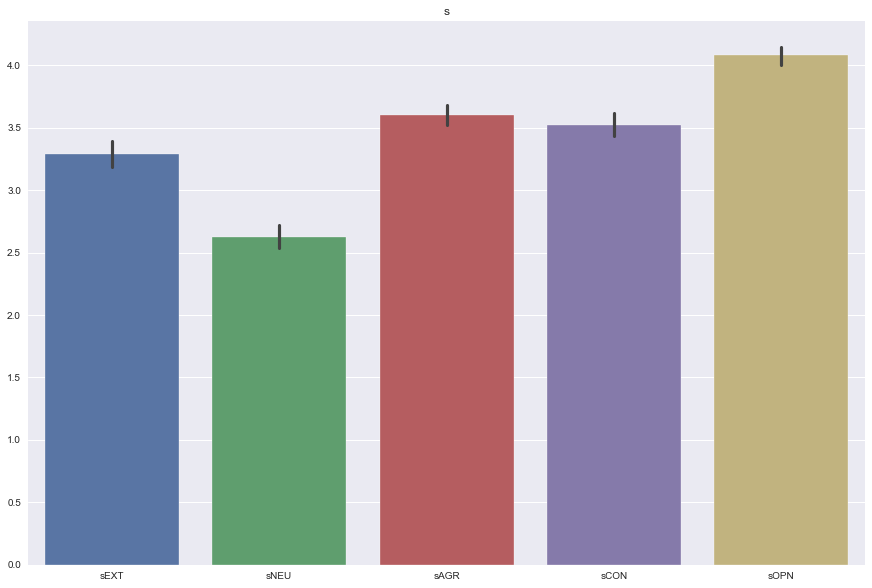

In [42]:
fig, ax = plt.subplots()
sns.barplot(data=unique_users[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']], ax=ax)

ax.set(title='s')
sns.set_palette('coolwarm')

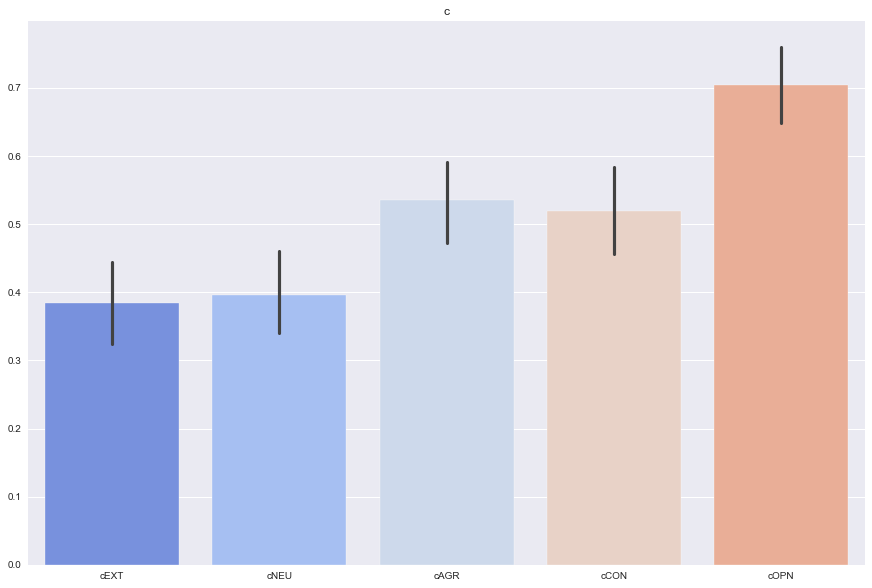

In [43]:
fig, ax = plt.subplots()
sns.barplot(data=unique_users[['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']], ax=ax)

ax.set(title='c')
sns.set_palette('coolwarm')

---

## Exploring status length and word count based on personality

#### Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.

You'll need to use `groupby()` five separate times for this.

In [44]:
df.head(1)

,auth_id,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5


In [45]:
#mean on status word count on 5 smallest
df.nsmallest(5, 'status_word_count').mean()

sEXT                  3.68
sNEU                  2.86
sAGR                  3.30
sCON                  3.52
sOPN                  4.15
status_length        12.20
status_word_count     1.00
dtype: float64

In [46]:
#mean on status word count on 5 largest
df.nlargest(5, 'status_word_count').mean()

sEXT                   3.39
sNEU                   2.52
sAGR                   4.55
sCON                   3.96
sOPN                   3.80
status_length        407.60
status_word_count     84.80
dtype: float64

In [47]:
#mean on status length on 5 smallest
df.nsmallest(5, 'status_length').mean()

sEXT                 3.406
sNEU                 2.800
sAGR                 3.934
sCON                 3.374
sOPN                 4.280
status_length        2.000
status_word_count    1.000
dtype: float64

In [48]:
#mean on status length on 5 largest
df.nlargest(5, 'status_length').mean()

sEXT                   3.22
sNEU                   3.27
sAGR                   3.52
sCON                   3.59
sOPN                   3.62
status_length        428.60
status_word_count     77.60
dtype: float64

#### Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts for posts by users who score both high (`y`) and low (`n`) in that personality category:

In [49]:
df.head(1)

,auth_id,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5


In [50]:
df['cEXT'].replace({'n': 0, 'y':1}, inplace=True)
df['cNEU'].replace({'n': 0, 'y':1}, inplace=True)
df['cAGR'].replace({'n': 0, 'y':1}, inplace=True)
df['cCON'].replace({'n': 0, 'y':1}, inplace=True)
df['cOPN'].replace({'n': 0, 'y':1}, inplace=True)

In [51]:
df.head(1)

,auth_id,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/19/09 03:21 PM,27,5


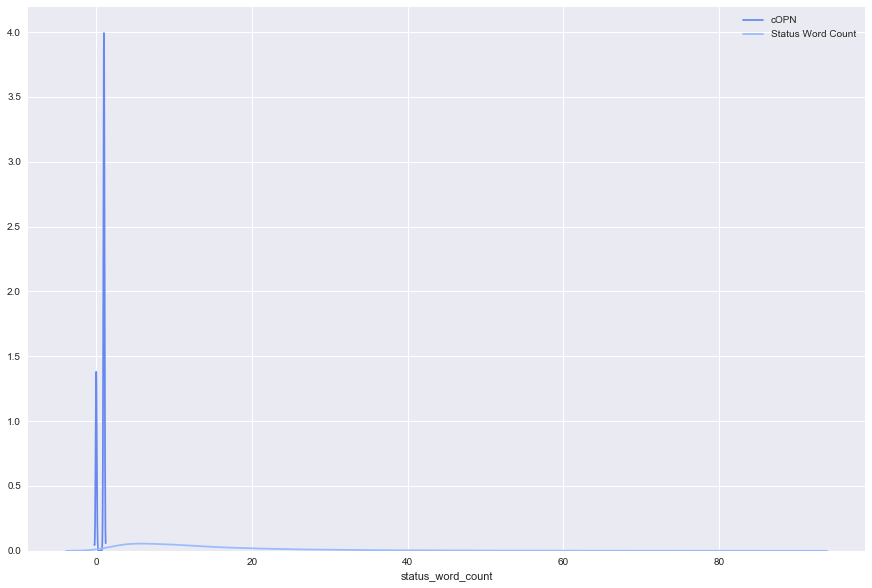

In [52]:
sns.distplot(df['cOPN'], hist = False, kde = True, label='cOPN')
sns.distplot(df['status_word_count'], hist = False, kde = True, label='Status Word Count');

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
#df.head(10)

In [55]:
X = df['STATUS']
y = df['status_word_count']

In [56]:
#X.value_counts(normalize = True)

In [57]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6643,), (3273,), (6643,), (3273,))

In [59]:
# Instantiate a CountVectorizer with the default hyperparameters.
cvec = CountVectorizer()

In [60]:
# Fit the vectorizer on status
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [61]:
#Transform 
X_train = cvec.transform(X_train)

In [62]:
# Convert X_train into a DataFrame.

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())
print(X_train_df.shape)
X_train_df.head()

(6643, 12316)


,00,000,000ft,00am,00pm,02pm,0330,05,0723,0766bc7f,...,ça,échangé,équipe,étais,était,étant,été,être,últimas,últimos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Transform test
X_test = cvec.transform(X_test)
X_test_df = pd.DataFrame(X_test.toarray(),
                         columns=cvec.get_feature_names())

print(X_test_df.shape)
X_test_df.head()

(3273, 12316)


,00,000,000ft,00am,00pm,02pm,0330,05,0723,0766bc7f,...,ça,échangé,équipe,étais,était,étant,été,être,últimas,últimos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Show the 15 most common words

In [64]:
from nltk.corpus import stopwords

In [65]:
# empty dictionary
top_words = {}

# loop through columns
for i in X_train_df.columns:
    # save sum of each column in dictionary
    top_words[i] =  X_train_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [66]:
# View most frequent words dataframe
most_freq.head(15)

,0,1
0,the,3334
1,to,2958
2,is,2118
3,and,2021
4,of,1390
5,in,1354
6,it,1104
7,for,1074
8,my,1037
9,you,954


### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

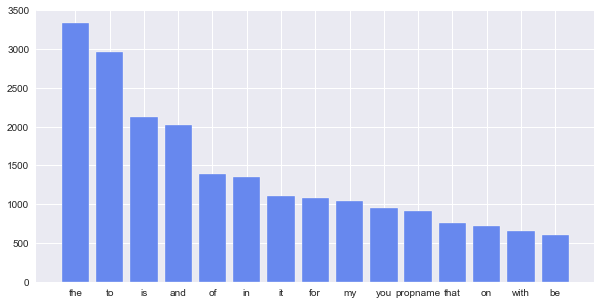

In [67]:
plt.figure(figsize = (10, 5))

# Visualize top 10 words
plt.bar(most_freq[0][:15], most_freq[1][:15]);

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

In [68]:
df[df.STATUS.str.contains('propname',case=False)].head(10)

,auth_id,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
6,b7b7764cfa1c523e4e93ab2a79a946c4,"saw a nun zombie, and liked it. Also, *PROPNAME* + Tentacle!Man + Psychic Powers = GREAT Party.",2.65,3.00,3.15,3.25,4.40,0,1,0,0,1,06/27/09 05:41 AM,95,17
18,b7b7764cfa1c523e4e93ab2a79a946c4,"is tired. *PROPNAME*, let me go to sleep pl0x.",2.65,3.00,3.15,3.25,4.40,0,1,0,0,1,07/11/09 05:44 AM,46,9
69,b7b7764cfa1c523e4e93ab2a79a946c4,has a fair idea of how to manage the 2.5 kids cliche... She just needs a very strong gentleman named *PROPNAME* and thriteen wet napkins.,2.65,3.00,3.15,3.25,4.40,0,1,0,0,1,11/24/09 05:07 AM,137,25
101,b7b7764cfa1c523e4e93ab2a79a946c4,has a serious crush on *PROPNAME*. <3,2.65,3.00,3.15,3.25,4.40,0,1,0,0,1,01/25/10 02:57 AM,37,7
104,318bf822d4f2bd3920367560218619c0,Mondays are the new thursdays- anthony bourdain + *PROPNAME* = forgetting your financial troubles,4.50,4.00,3.00,4.50,3.75,1,1,0,1,0,06/23/09 05:41 AM,98,14
118,318bf822d4f2bd3920367560218619c0,is *PROPNAME*'s bestbian,4.50,4.00,3.00,4.50,3.75,1,1,0,1,0,08/23/09 06:03 AM,24,3
139,318bf822d4f2bd3920367560218619c0,is in love with *PROPNAME*.,4.50,4.00,3.00,4.50,3.75,1,1,0,1,0,10/04/09 03:09 AM,27,5
158,318bf822d4f2bd3920367560218619c0,is in love. With *PROPNAME*.,4.50,4.00,3.00,4.50,3.75,1,1,0,1,0,12/11/09 05:35 AM,28,5
170,318bf822d4f2bd3920367560218619c0,Ten Movies to Watch Right Now (and some you can Instant Netflix) 1. La Vie En Rose 2. Shrink (if you love LA) 3. Paris Je'taime (if you love Paris) 3. Clay Pidgeons (*PROPNAME* is priceless) 4. Quills 5. Away We Go 6. Sunshine Cleaning 7. A League of Their Own 8. Smart People (I Heart *PROPNAME*'s Page and SJP) 9. Frost//Nixon 10. Doubt,4.50,4.00,3.00,4.50,3.75,1,1,0,1,0,10/11/09 01:39 AM,338,64
202,ecbddbfe00e0f83cfdb802a7186061c7,"ATTENTION EVERYONE!!! Vote for the short ""AFTER HOURS"" to support *PROPNAME* - our local Michigan talent and a wonderful person. Repost please!!! http:////www.thirteen.org//sites//reel13//category//vote//",4.30,2.15,3.60,3.30,4.10,1,0,1,0,1,11/24/09 07:11 AM,204,23


#### Provide a short explanation of what you believe `propname` to be:

Hint: The attached PDF also contains an explanation.

It's a functionality for JS used with data attribute overrides 

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

#### Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:

In [69]:
df.head(1)

,auth_id,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/19/09 03:21 PM,27,5


In [70]:
df_conct = [X_train_df, df]

In [71]:
test_and_scores = pd.concat(df_conct)

In [72]:
test_and_scores

,00,000,000ft,00am,00pm,02pm,0330,05,0723,0766bc7f,...,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.90,4.60,0.0,0.0,1.0,0.0,1.0,01/28/10 11:48 AM,28.0,5.0
9912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.95,4.50,1.0,1.0,1.0,1.0,1.0,02/02/10 08:08 PM,27.0,5.0
9913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.95,4.50,1.0,1.0,1.0,1.0,1.0,02/09/10 08:04 PM,31.0,6.0
9914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,3.95,0.0,1.0,0.0,0.0,1.0,02/10/10 02:01 AM,21.0,4.0


In [73]:
df.head(1)

,auth_id,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/19/09 03:21 PM,27,5


#### Show the 25 most common words for statuses from high-cAGR users:

In [76]:
df['cAGR'].value_counts()

1    5267
0    4649
Name: cAGR, dtype: int64

In [80]:
count_vect = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = "english", 
                             max_features = 25) 

# input for CountVectorizer is an array of strings
vector_input = df[df['cAGR'] == 1]['STATUS']

# fit_transform the vectorizer
words = count_vect.fit_transform(vector_input)

# convert output to a Numpy array
words = words.toarray()

In [81]:
# get the words
cAGR_list = count_vect.get_feature_names()
print(cAGR_list)

['day', 'don', 'going', 'good', 'got', 'happy', 'home', 'just', 'know', 'life', 'like', 'll', 'love', 'new', 'night', 'people', 'propname', 'really', 'time', 'today', 'tomorrow', 'tonight', 'want', 'weekend', 'work']


#### Show the 25 most common words for statuses from low-cAGR users:

In [82]:
count_vect = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = "english", 
                             max_features = 25) 

# input for CountVectorizer is an array of strings
vector_input = df[df['cAGR'] == 0]['STATUS']

# fit_transform the vectorizer
words2 = count_vect.fit_transform(vector_input)

# convert output to a Numpy array
words2 = words2.toarray()

In [83]:
# get the words
cAGR_low_list = count_vect.get_feature_names()
print(cAGR_low_list)

['day', 'don', 'going', 'good', 'got', 'happy', 'home', 'just', 'know', 'life', 'like', 'love', 'new', 'night', 'people', 'propname', 'really', 'think', 'time', 'today', 'tomorrow', 'tonight', 'want', 'week', 'work']


### (BONUS) Most common bigrams:

This is a bonus section and not required.

Find the 10 most common bigrams in the dataset.

In [85]:
# View most frequent words dataframe
most_freq.head(15)

,0,1
0,the,3334
1,to,2958
2,is,2118
3,and,2021
4,of,1390
5,in,1354
6,it,1104
7,for,1074
8,my,1037
9,you,954


In [86]:
#using words from most frequent above 

from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

add_stop_words = ['the', 'to', 'is', 'of', 'in', 'it', 'for', 'with', 'be', 'that']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [88]:
#Trying out count vect to find bigrams 

count_vect = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = stop_words, 
                             max_features = 10000, 
                             ngram_range=(1, 3)
                            ) 

# input for CountVectorizer is an array of strings
vector_input = df['STATUS']

ngrams_words= count_vect.fit_transform(vector_input)

# convert output to a Numpy array
ngrams_words = ngrams_words.toarray() 

In [90]:
word_matrix = pd.DataFrame(ngrams_words, columns=count_vect.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(50)

propname             1309
just                  717
day                   534
like                  506
time                  424
going                 414
today                 402
new                   386
work                  369
good                  354
got                   314
night                 312
love                  292
tomorrow              277
know                  276
happy                 272
people                268
home                  267
life                  260
tonight               256
don                   253
really                246
want                  217
think                 207
week                  185
make                  183
great                 183
need                  182
getting               180
ll                    178
weekend               171
way                   170
come                  168
school                167
sleep                 167
right                 165
fun                   158
finally               154
oh          

### (BONUS) Most common trigrams:

This is a bonus section and not required.

Find the 10 most common trigrams in the dataset.

In [104]:
#tokens = nltk.word_tokenize(bigrams)
#list(nltk.trigrams(bigrams))

---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as _explanatory_. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.